In [7]:
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM
import graphviz
from scipy.stats import norm, beta, gamma, poisson, binom, bernoulli, expon, uniform
import matplotlib.pyplot as plt
%matplotlib widget


a


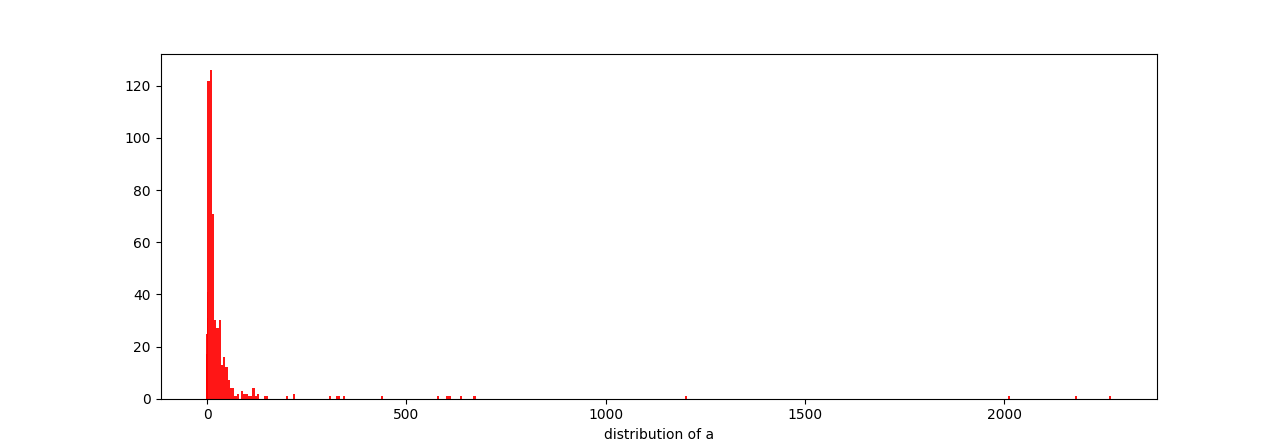

c


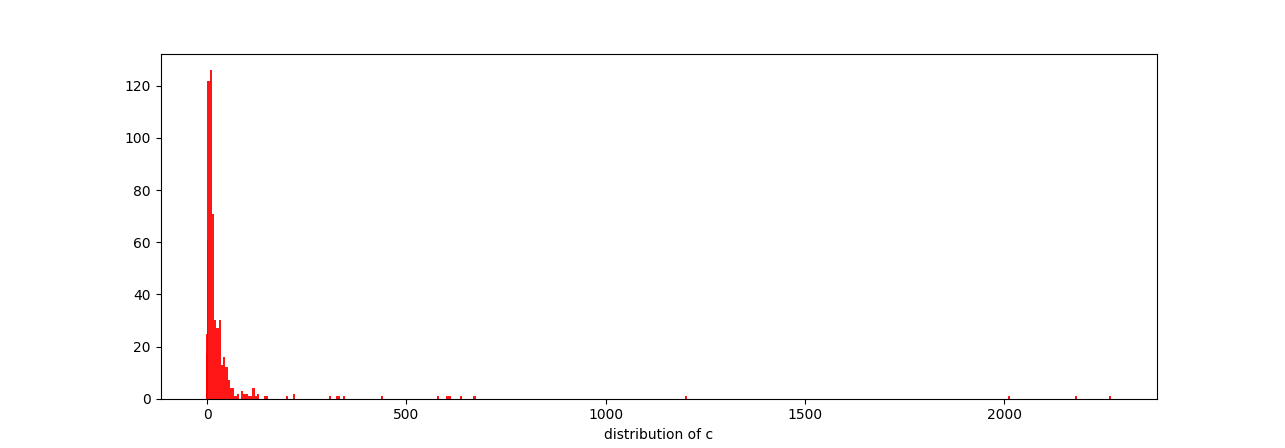

e


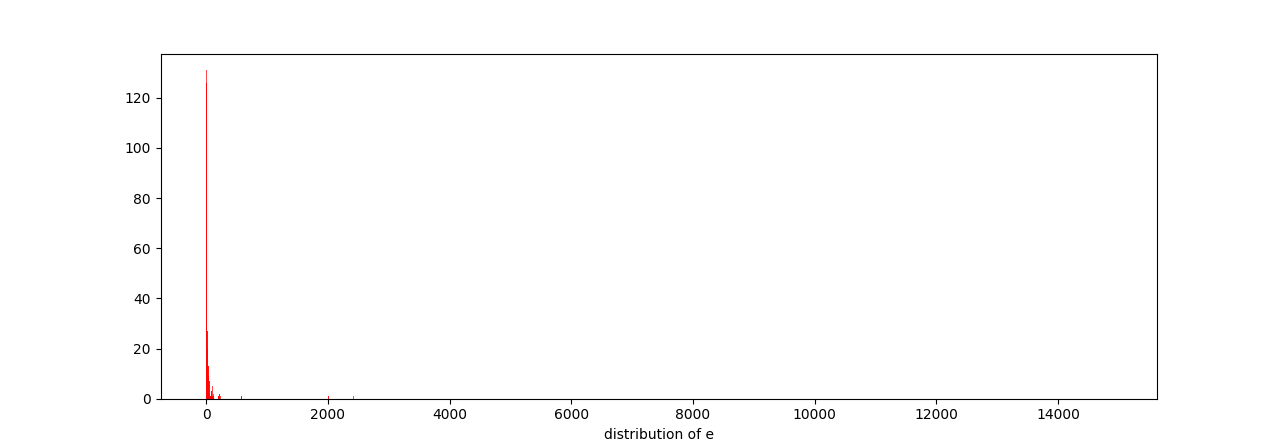

In [8]:

norm_ppf = lambda x: norm.ppf(x, 0, 1)
    
normbis_ppf = lambda x: norm.ppf(x, 0,2 )
beta_ppf = lambda x: beta.ppf(x, 2, 2)
gamma_ppf = lambda x: gamma.ppf(x, 2, 2)
poisson_ppf = lambda x: poisson.ppf(x, 2)
binom_ppf = lambda x: binom.ppf(x, 2, 0.5)
bernoulli_ppf = lambda x: bernoulli.ppf(x, 0.5)
expon_ppf = lambda x: expon.ppf(x, 0, 1)
uniform_ppf = lambda x: uniform.ppf(x, 0, 1)



# Define the nodes, edges, unit nodes, subunit nodes, and sizes
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"),('a','c'), ("b", "c"), ("c", "d"),("b","d"), ("d", "e"),("b", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d","b"]
sizes = [50]*500


# Define the additive functions

# be careful to specify the order and functions depending on sets
additive_functions = {
    "a": {},
    "b": {"a": lambda a: a * 0.1},
    "c": {"a": lambda a: a * 0.1, "b": lambda b: np.mean(np.array(list(b))) * 0.1},
    "d": {"b": lambda b: b * 0.1, "c": lambda c: c * 0.1},
    "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.std(np.exp(np.array(list(b))))}

}

# Define the randomness
randomness = {
    "a": norm_ppf,
    "b": expon_ppf,
    "c": norm_ppf,
    "d": norm_ppf,
    "e": norm_ppf
}



# Create an instance of the HSCM class
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={},data={})
# hscm.print_predecessors()
hscm.additive_model(additive_functions,randomness)
# Sample data
sampled_data = hscm.sample_data()

hscm.set_distribution_from_data()

def print_sampled_data(sampled_data):
    for key in sampled_data:
        print(key, sampled_data[key])

# Print the sampled data
# print_sampled_data(sampled_data)



# Print the graph
hscm.cgm.draw()
s1=hscm.plot_data()


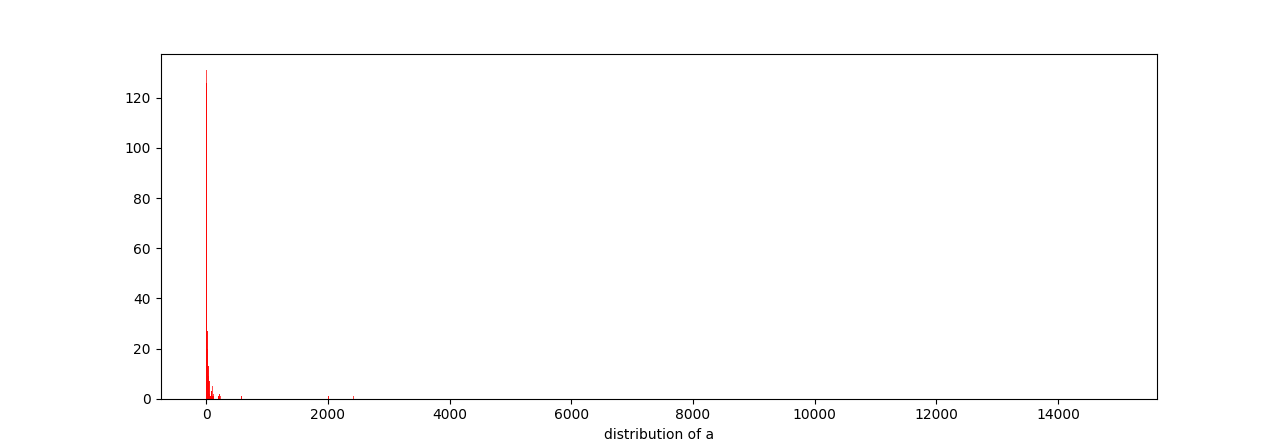

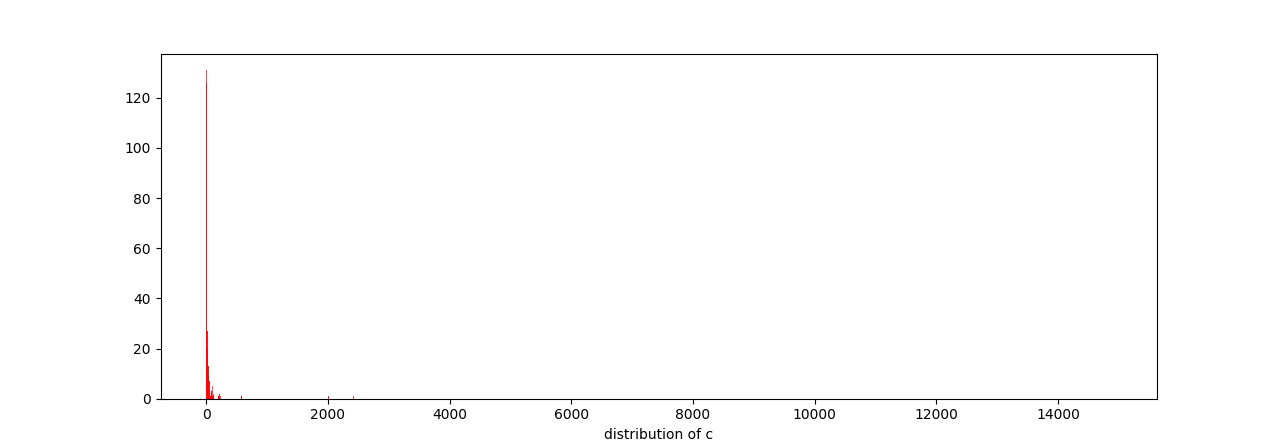

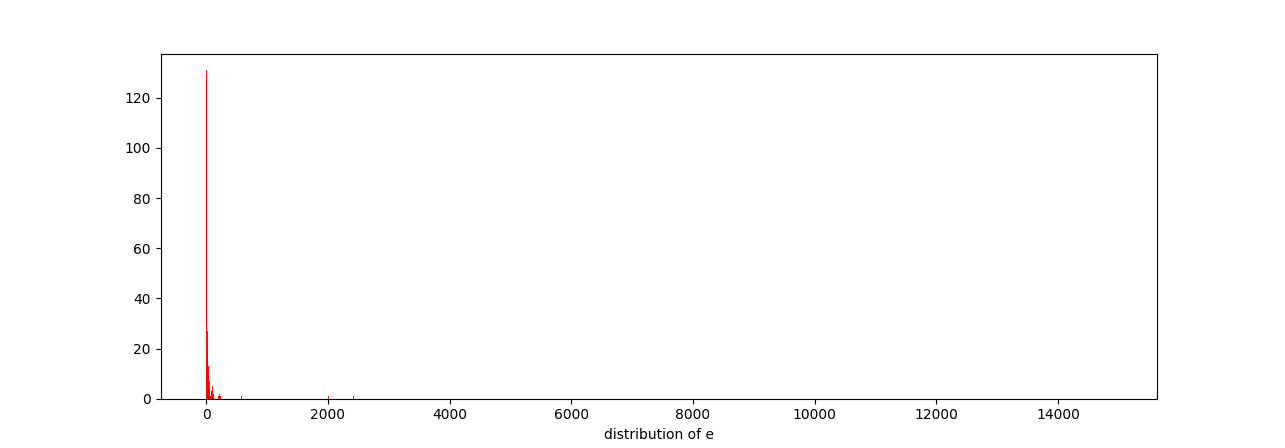

In [9]:
hscm.plot_unit_distributions()